# Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/drive


# Import pip


In [ ]:
!git clone https://github.com/abhyantrika/nanonets_object_tracking.git

Cloning into 'nanonets_object_tracking'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 105 (delta 1), reused 5 (delta 0), pack-reused 95
Receiving objects: 100% (105/105), 13.59 MiB | 34.36 MiB/s, done.
Resolving deltas: 100% (18/18), done.


# Cloning and Building Darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14665, done.
remote: Total 14665 (delta 0), reused 0 (delta 0), pack-reused 14665
Receiving objects: 100% (14665/14665), 13.24 MiB | 22.86 MiB/s, done.
Resolving deltas: 100% (9982/9982), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# Helper Functions

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Upload weights, obj.data, obj.name, and cfg to darknet file

In [ ]:
upload()

Saving yolov4-custom-1class_best.weights to yolov4-custom-1class_best.weights
saved file yolov4-custom-1class_best.weights


# Run Detection using Yolov4 and Darknet

In [ ]:
# run darknet detection on test images
!./darknet detector test obj.data yolov4-custom-1class.cfg yolov4-custom-1class_best.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x 

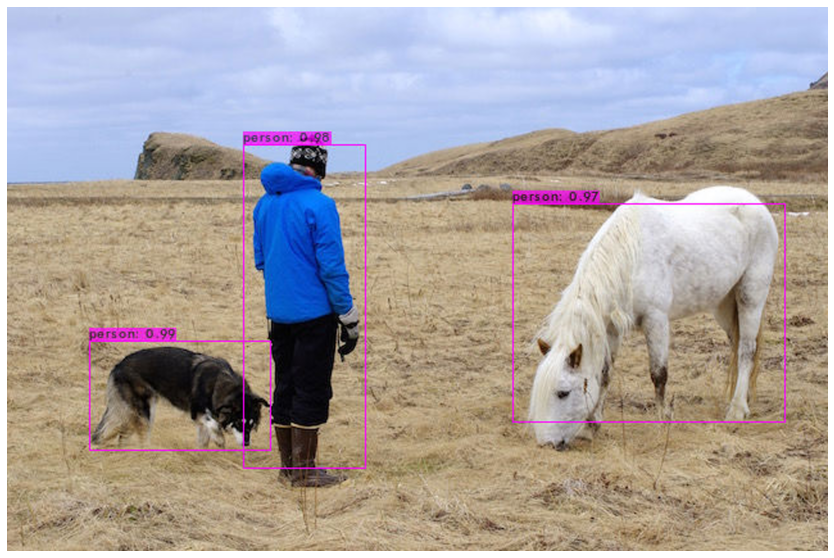

In [ ]:
imShow('predictions.jpg')

# Video-Testing Crowd Detection

In [ ]:
# upload necessary files
upload()

Saving videoplayback.mp4 to videoplayback.mp4
saved file videoplayback.mp4


In [ ]:
!./darknet detector demo obj.data yolov4-custom-1class.cfg yolov4-custom-1class_best.weights -dont_show videoplayback.mp4 -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.

FPS:41.2 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 97% 

FPS:40.9 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 97% 

FPS:40.9 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 98% 

FPS:40.9 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 98% 

FPS:40.0 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 97% 

FPS:40.2 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 97% 

FPS:40.3 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 98% 

FPS:40.4 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 95% 

FPS:40.4 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 93% 

FPS:40.6 	 AVG_FPS:40.7

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 96% 

FPS:40.6 	 AVG_FPS:40.7

 cvWriteFrame

In [ ]:
# download the video with detections shown
download('results.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Object tracking

In [ ]:
!git clone https://github.com/theAIGuysCode/yolov4-deepsort.git

Cloning into 'yolov4-deepsort'...
remote: Enumerating objects: 137, done.
remote: Total 137 (delta 0), reused 0 (delta 0), pack-reused 137
Receiving objects: 100% (137/137), 76.82 MiB | 43.32 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [ ]:
%cd yolov4-deepsort

/content/darknet/yolov4-deepsort


In [ ]:
!python save_model.py --model yolov4 --weights ../yolov4-custom-1class_best.weights

2021-01-11 09:36:56.170819: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-11 09:36:57.989878: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-11 09:36:57.990761: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-11 09:36:58.004334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-11 09:36:58.004970: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-01-11 09:36:58.005009: I tensorflow/stream_executor/platform/def

In [ ]:
!ls -al checkpoints

total 12
drwxr-xr-x  3 root root 4096 Jan 11 09:02 .
drwxr-xr-x 10 root root 4096 Jan 11 09:41 ..
drwxr-xr-x  4 root root 4096 Jan 11 09:37 yolov4-416


In [ ]:
!python object_tracker.py --video ./data/video/videoplayback.mp4 --output ./outputs/demo.avi --model yolov4 --dont_show --count

Traceback (most recent call last):
  File "object_tracker.py", line 5, in <module>
    import tensorflow as tf
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py", line 41, in <module>
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/__init__.py", line 46, in <module>
    from tensorflow.python import data
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/__init__.py", line 25, in <module>
    from tensorflow.python.data import experimental
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/experimental/__init__.py", line 96, in <module>
    from tensorflow.python.data.experimental import service
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/experimental/service/__init__.py", line 140, in <module>
    from tensorflow.python.data.experimental.ops.data_service_ops import distribute
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/experimental/ops/data_service_ops.py", li

In [ ]:
download('outputs/demo.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
download('../yolov4-custom-1class_best.weights')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>